# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mujadid Fauzan Salim Tamin
- **Email:** kaptozora@gmail.com
- **ID Dicoding:** MUJADID FAUZAN SALIM TAMIN

## Menentukan Pertanyaan Bisnis

- Kapan jam favorit user untuk bersepeda?
- Bagaimana faktor cuaca dapat memengaruhi user untuk bersepeda?
- Predicted Demand

## Import Semua Packages/Library yang Digunakan

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="pastel")


!pip freeze > requirements.txt

## Data Wrangling

### Gathering Data

In [11]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- terdapat 2 tabel, yaitu tabel day dan tabel hour
- masing - masing tabel memiliki data mengenai user yang bersepeda pada hari / jam tertentu
- terdapat juga data lingkungan dan cuaca pada hari dan jam tertentu
- saya akan memilih tabel hour, karena saya akan menganalisis spesiifik pada jam

### Assessing Data

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [15]:
print("Jumlah duplikat data: ", df_hour.duplicated().sum())

Jumlah duplikat data:  0


In [16]:
df_hour.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


**Insight:**
- dteday masih bertype object, harus diubah menjadi datetime
- tidak terdapat duplikasi dan juga tidak ada missing value

### Cleaning Data

In [17]:
df_hour.drop(["instant"], axis=1, inplace=True)

In [18]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

**Insight:**
- membersihkan data dengan menghilangkan kolom yang tidak diperlukan
- mengubah type dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore hour df

In [20]:
df_hour.groupby(by="season").agg({"temp":"mean", "hum":"mean", "windspeed":"mean"})

,temp,hum,windspeed
season,,,
1,0.299147,0.581348,0.215107
2,0.544663,0.627022,0.203410
3,0.706410,0.633167,0.171593
4,0.423138,0.667124,0.170819


In [21]:
df_hour.groupby(by="hr").agg({"cnt":"sum", "registered":"sum", "casual":"sum"}).sort_values(by="cnt", ascending=False)

,cnt,registered,casual
hr,,,
17,336860,282640,54220
18,309772,265276,44496
8,261001,245240,15761
16,227748,173914,53834
19,226789,191284,35505
13,184919,132206,52713
12,184414,134696,49718
15,183149,128543,54606
14,175652,120563,55089


In [22]:
df_hour.groupby(by="temp").agg({"cnt":"sum", "registered":"sum", "casual":"sum"}).sort_values(by="cnt", ascending=False)

,cnt,registered,casual
temp,,,
0.70,177298,140211,37087
0.72,163449,124292,39157
0.74,161587,123194,38393
0.66,156204,123418,32786
0.64,154985,122227,32758
0.60,149905,120463,29442
0.62,148185,118576,29609
0.76,135660,102985,32675
0.56,123756,99843,23913


In [23]:
df_hour.groupby(by="hum").agg({"cnt":"sum", "registered":"sum", "casual":"sum"}).sort_values(by="cnt", ascending=False)

,cnt,registered,casual
hum,,,
0.83,93265,79545,13720
0.55,86206,66889,19317
0.46,79253,62677,16576
0.66,76920,61099,15821
0.62,76125,60961,15164
...,...,...,...
0.08,77,61,16
0.97,64,46,18
0.14,38,28,10


In [24]:
df_hour.groupby(by="windspeed").agg({"cnt":"sum", "registered":"sum", "casual":"sum"}).sort_values(by="cnt", ascending=False)

,cnt,registered,casual
windspeed,,,
0.0000,350203,286865,63338
0.1642,332998,272251,60747
0.1940,332407,270116,62291
0.2239,320678,258200,62478
0.1343,306423,251246,55177
0.2537,276880,220783,56097
0.1045,268821,223021,45800
0.2836,225882,178873,47009
0.0896,213804,176771,37033


**Insight:**
- Dari EDA kita mendapat informasi mengenai berapa banyak user yang bersepeda ketika season, tem, hum, dan windspeed tertentu

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan jam favorit user untuk bersepeda?

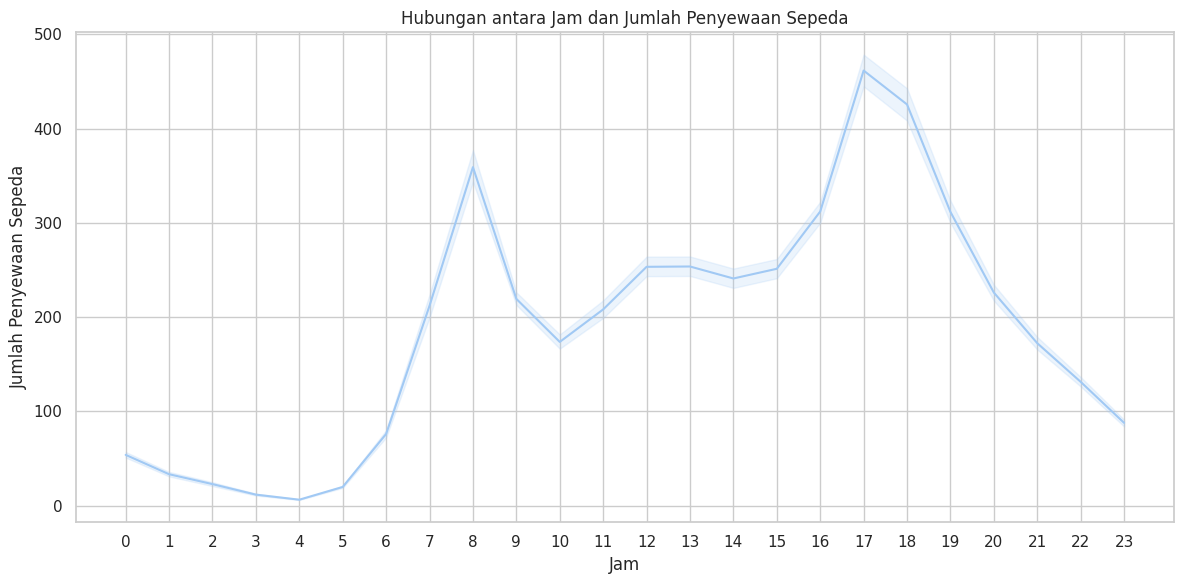

In [25]:
# Melihat hubungan antara jam dan jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=df_hour)

plt.xticks(ticks=range(0, 24), labels=range(0, 24))

plt.title('Hubungan antara Jam dan Jumlah Penyewaan Sepeda')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana faktor cuaca dapat memengaruhi user untuk bersepeda?

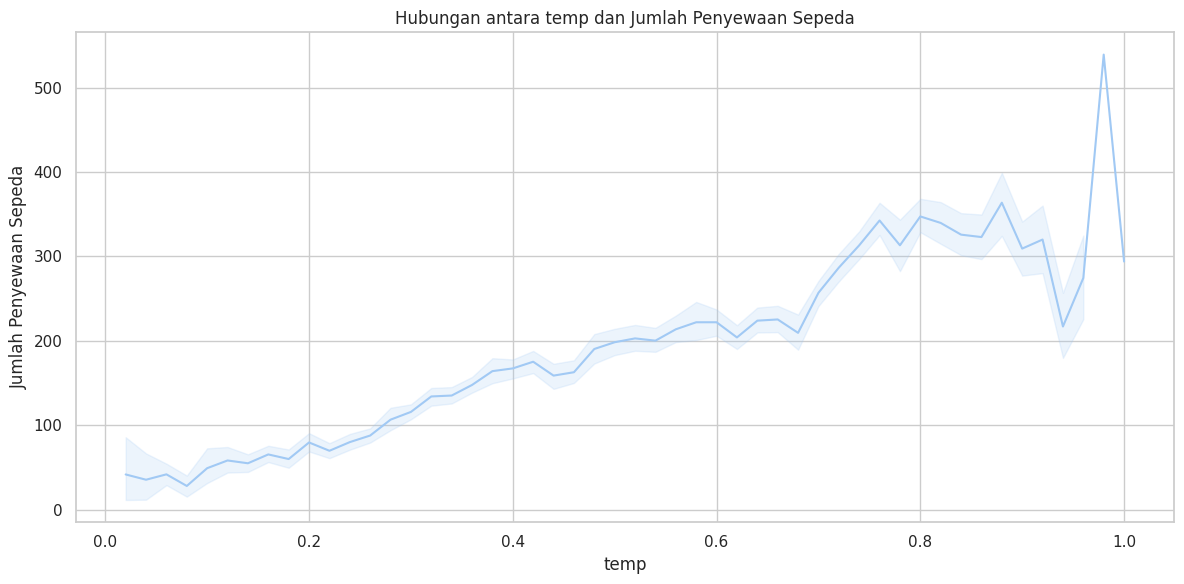

In [26]:
# Melihat hubungan antara temperature dan jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x='temp', y='cnt', data=df_hour)

plt.title('Hubungan antara temp dan Jumlah Penyewaan Sepeda')
plt.xlabel('temp')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.tight_layout()
plt.show()

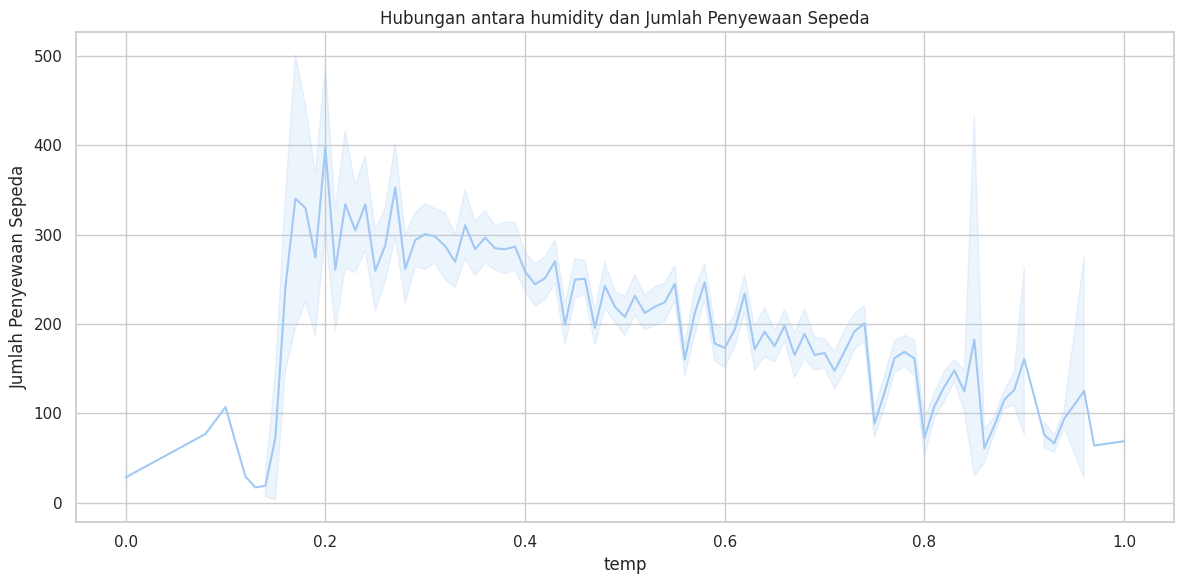

In [27]:
# Melihat hubungan antara humidity dan jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x='hum', y='cnt', data=df_hour)

plt.title('Hubungan antara humidity dan Jumlah Penyewaan Sepeda')
plt.xlabel('temp')
plt.ylabel('Jumlah Penyewaan Sepeda')

plt.tight_layout()
plt.show()

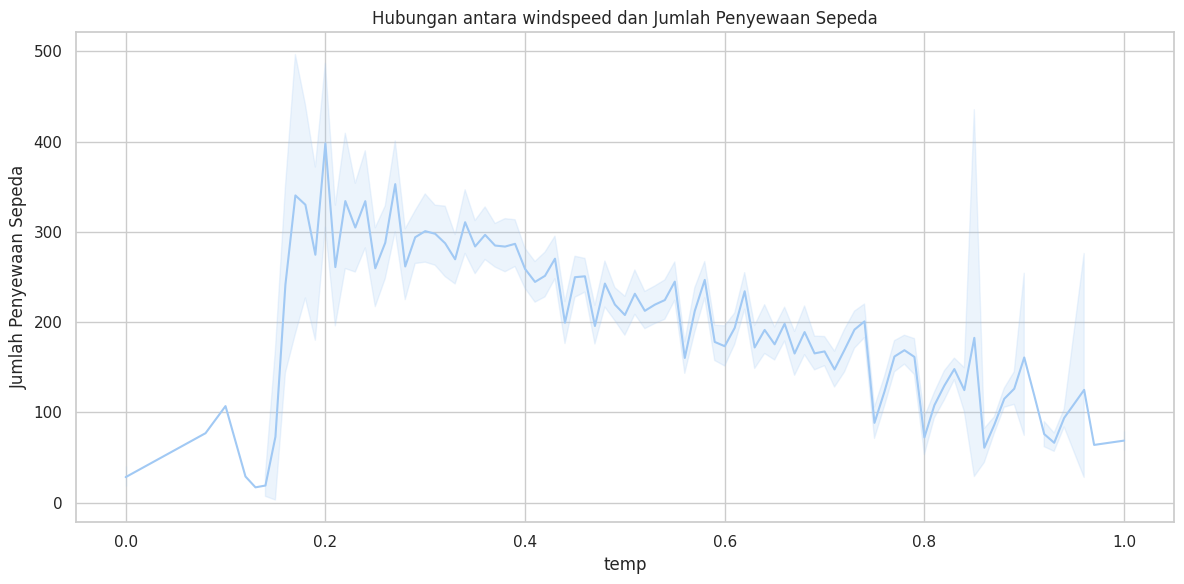

In [28]:
# Melihat hubungan antara windspeed dan jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(x='hum', y='cnt', data=df_hour)

# Memberi judul dan label sumbu
plt.title('Hubungan antara windspeed dan Jumlah Penyewaan Sepeda')
plt.xlabel('temp')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Dari visualisasi diatas kita dapat melihat beberapa insight mengenai jumlah penyewaan sepeda dan beberapa variabel

## Analisis Lanjutan (Opsional)
## Predicted Demand

In [31]:
X = df_hour[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df_hour['cnt']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, X_train).fit()

y_pred = model.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     718.4
Date:                Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:00:40   Log-Likelihood:            -1.1178e+05
No. Observations:               17379   AIC:                         2.236e+05
Df Residuals:                   17367   BIC:                         2.237e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.9211      7.093     11.127      0.0

In [32]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 21928.038274581835
Root Mean Squared Error (RMSE): 148.08118811848396
Mean Absolute Error (MAE): 112.38479426729732


## Conclusion

- Berdasarkan data hubungan antara jam dan jumlah penyewaan sepeda, puncak penyewaan terjadi pada sore hari sekitar jam 17:00-18:00
- Berdasarkan data hubungan antara temperatur, kelembapan, dan kecepatan angin terhadap jumlah penyewaan sepeda, terlihat bahwa penyewaan sepeda cenderung lebih tinggi pada temperatur yang sedang, sekitar 0.60-0.74, dan menurun ketika temperatur terlalu tinggi atau rendah. Pada kelembapan (humidity), penyewaan lebih banyak terjadi saat kelembapan berkisar antara 0.46-0.66. Kecepatan angin (windspeed) yang rendah hingga sedang, di bawah 0.3, cenderung menghasilkan jumlah penyewaan yang lebih tinggi, sedangkan pada kecepatan angin yang lebih tinggi, penyewaan menurun drastis. Secara keseluruhan, kondisi cuaca yang moderat mendukung peningkatan penggunaan sepeda, sementara kondisi ekstrem, terutama kecepatan angin tinggi, menurunkan minat penyewaan.
-
Model regresi yang dibuat menggunakan metode OLS berhasil menghasilkan nilai R-squared sebesar 0.314 dan Adjusted R-squared sebesar 0.313. Selain itu, model ini juga menunjukkan hasil yang sesuai berdasarkan matriks evaluasi yang digunakan.
      * Mean Squared Error (MSE): 21928.038274581835
      * Root Mean Squared Error (RMSE): 148.08118811848396
      * Mean Absolute Error (MAE): 112.384794267297322
Persamaan Regresi yang didapat:

  cnt = 82.5880 + 18.581 (season) + 79.0259 (year) + 1.0013 (month) - 25.0661 (holiday) + 1.4791 (weekday) + 3.4873 (workingday) + 6.5343 (weathersit) + 72.4434 (temp) + 276.4929 (atemp) - 285.6758 (hum) + 58.7544 (windspeed)





